<a href="https://colab.research.google.com/github/mawhy/OpenCV/blob/master/Deep_Privacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on https://github.com/hukkelas/DeepPrivacy

In [ ]:
!git clone https://github.com/hukkelas/DeepPrivacy
! cd DeepPrivacy

Cloning into 'DeepPrivacy'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 1426 (delta 16), reused 19 (delta 8), pack-reused 1389
Receiving objects: 100% (1426/1426), 12.50 MiB | 34.50 MiB/s, done.
Resolving deltas: 100% (931/931), done.


In [ ]:
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local
!conda install pytorch torchvision cudatoolkit=10.0 -c pytorch -y
!conda install cython numpy scikit-learn>=0.2 matplotlib pandas tqdm tflib autopep8 moviepy opencv-python requests -y 
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')


--2020-06-19 20:30:14--  https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh [following]
--2020-06-19 20:30:14--  https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 577996269 (551M) [application/x-sh]
Saving to: ‘Anaconda3-5.1.0-Linux-x86_64.sh’

Anaconda3-5.1.0-Lin 100%[===================>] 551.22M   176MB/s    in 3.1s    

2020-06-19 20:30:17 (176 MB/s) - ‘Anaconda3-5.1.0-Linux-x86_64.sh’ sa

In [ ]:
%%writefile setup.sh

git clone https://github.com/NVIDIA/apex
cd apex
pip install -v --no-cache-dir ./

Writing setup.sh


In [ ]:
! mv DeepPrivacy/deep_privacy . && mkdir -p models/large/checkpoints && mv DeepPrivacy/models/isvc_large/config.yml models/large
# Download checkpoint and save it to models/large/checkpoints

In [ ]:
!sh setup.sh

Cloning into 'apex'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 7274 (delta 9), reused 6 (delta 0), pack-reused 7255
Receiving objects: 100% (7274/7274), 13.87 MiB | 23.35 MiB/s, done.
Resolving deltas: 100% (4908/4908), done.
Non-user install because site-packages writeable
Created temporary directory: /tmp/pip-ephem-wheel-cache-qhliqmxf
Created temporary directory: /tmp/pip-req-tracker-eei510mi
Initialized build tracking at /tmp/pip-req-tracker-eei510mi
Created build tracker: /tmp/pip-req-tracker-eei510mi
Entered build tracker: /tmp/pip-req-tracker-eei510mi
Created temporary directory: /tmp/pip-install-s63wyj2u
Processing /content/apex
  Created temporary directory: /tmp/pip-req-build-z56k1q4j
  Added file:///content/apex to build tracker '/tmp/pip-req-tracker-eei510mi'
    Running setup.py (path:/tmp/pip-req-build-z56k1q4j/setup.py) egg_info for package from file:///content/ape

In [ ]:
from google.colab import auth
auth.authenticate_user()
from googleapiclient.discovery import build
import io
from googleapiclient.http import MediaIoBaseDownload
import matplotlib.pyplot as plt

drive_service = build('drive', 'v3')

def download_file(file_id, filepath):
    request = drive_service.files().get_media(fileId=file_id)
    downloaded = io.BytesIO()
    downloader = MediaIoBaseDownload(downloaded, request)
    done = False
    while done is False:
        # _ is a placeholder for a progress object that we ignore.
        # (Our file is small, so we skip reporting progress.)
        _, done = downloader.next_chunk()

    downloaded.seek(0)
    with open(filepath, "wb") as fp:
        fp.write(downloaded.read())
    #rint('Downloaded file contents are: {}'.format(downloaded.read()))
download_file("101g6XHACr0cwgXBf8LgFfNrHR3OPLBHv", "models/large/checkpoints/step_40000000.ckpt")


In [ ]:
! mkdir deep_privacy/detection/dsfd/weights
download_file("1WeXlNYsM6dMP3xQQELI-4gxhwKUQxc3-", "deep_privacy/detection/dsfd/weights/WIDERFace_DSFD_RES152.pth")


In [ ]:
! ls 

'=0.2'				   apex		  models
 adc.json			   deep_privacy   sample_data
 Anaconda3-5.1.0-Linux-x86_64.sh   DeepPrivacy	  setup.sh


In [ ]:
from deep_privacy.config_parser import load_config
from deep_privacy.inference import infer, deep_privacy_anonymizer
import torch

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1531904/45929032 bytes (3.3%)5275648/45929032 bytes (11.5%)8986624/45929032 bytes (19.6%)12337152/45929032 bytes (26.9%)15900672/45929032 bytes (34.6%)19750912/45929032 bytes (43.0%)23412736/45929032 bytes (51.0%)27164672/45929032 bytes (59.1%)30924800/45929032 bytes (67.3%)34684928/45929032 bytes (75.5%)38445056/45929032 bytes (83.7%)42090496/45929032 bytes (91.6%)

Downloading: "https://download.pytorch.org/models/keypointrcnn_resnet50_fpn_coco-fc266e95.pth" to /root/.cache/torch/checkpoints/keypointrcnn_resnet50_fpn_coco-fc266e95.pth


In [ ]:
config = load_config("models/large/config.yml")
checkpoint = torch.load("models/large/checkpoints/step_40000000.ckpt")
generator = infer.init_generator(config, checkpoint)

extending G 512
extending G 512
extending G 512
extending G 256
extending G 128


In [ ]:
anonymizer = deep_privacy_anonymizer.DeepPrivacyAnonymizer(generator,
                                                           batch_size=32,
                                                           use_static_z=True,
                                                           keypoint_threshold=.1,
                                                           face_threshold=.6)

Anonymizer initialized. Keypoint threshold: 0.1Face threshold: 0.6


# Anonymize images


--2020-06-19 20:42:29--  https://pixel.nymag.com/imgs/daily/intelligencer/2018/04/24/14-donald-trump-barack-obama.w700.h700.jpg
Resolving pixel.nymag.com (pixel.nymag.com)... 151.101.200.70
Connecting to pixel.nymag.com (pixel.nymag.com)|151.101.200.70|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pyxis.nymag.com/v1/imgs/3cd/260/2e47b236a921c94e88b212c0ed0eabe861-14-donald-trump-barack-obama.rsquare.w700.jpg [following]
--2020-06-19 20:42:29--  https://pyxis.nymag.com/v1/imgs/3cd/260/2e47b236a921c94e88b212c0ed0eabe861-14-donald-trump-barack-obama.rsquare.w700.jpg
Resolving pyxis.nymag.com (pyxis.nymag.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to pyxis.nymag.com (pyxis.nymag.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54655 (53K) [image/jpeg]
Saving to: ‘images/example.jpg’

images/example.jpg  100%[===================>]  53.37K  --.-KB/s    in 0.03s   

202

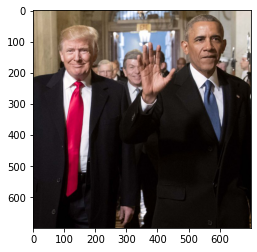

In [ ]:
# Download images
! mkdir images
! wget https://pixel.nymag.com/imgs/daily/intelligencer/2018/04/24/14-donald-trump-barack-obama.w700.h700.jpg  -O images/example.jpg
plt.imshow(plt.imread("images/example.jpg"))

In [ ]:
anonymizer.anonymize_image_paths(["images/example.jpg"], ["images/example_anonymized.jpg"])

Batch detecting faces:   0%|          | 0/1 [00:00<?, ?it/s]

Finished loading DSFD model!


Post-processing: 100%|██████████| 1/1 [00:00<00:00, 12.51it/s]


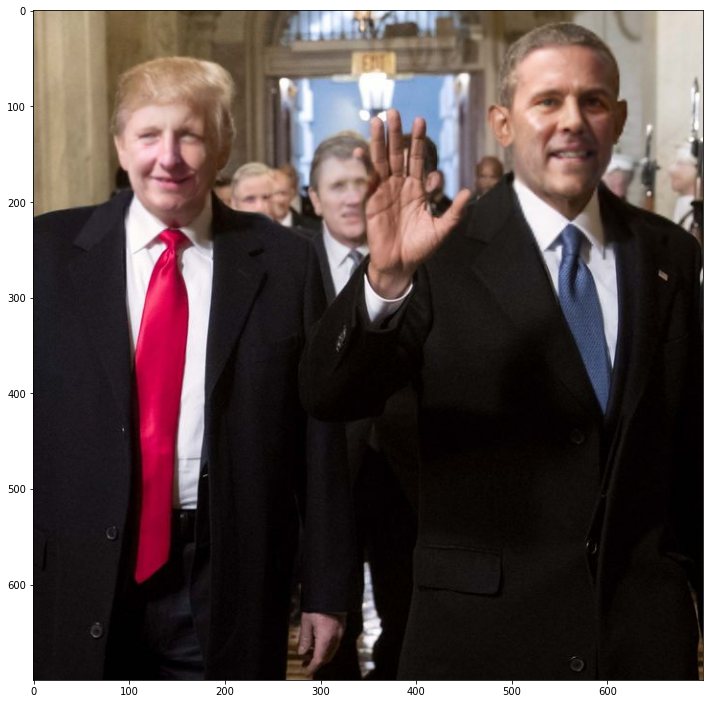

In [ ]:
plt.figure(figsize=(12,20))
plt.imshow(plt.imread("images/example_anonymized.jpg"))

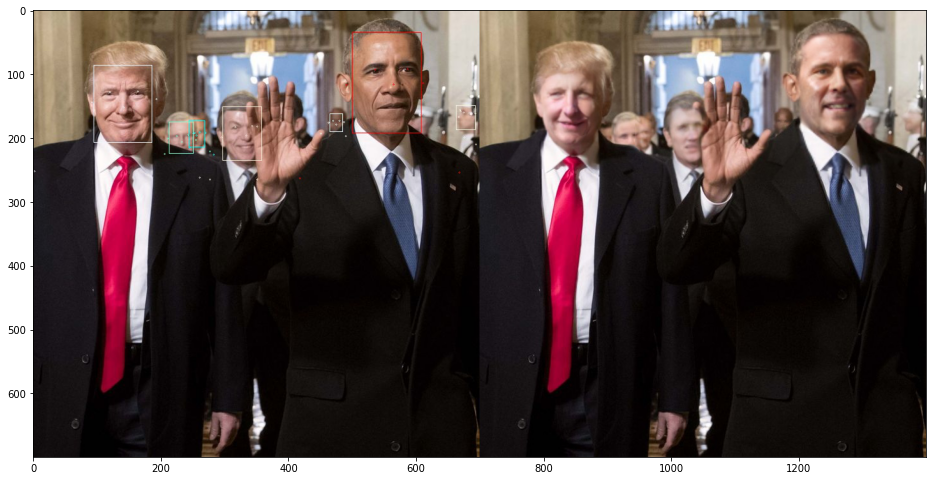

In [ ]:
plt.figure(figsize=(16,40))
plt.imshow(plt.imread("images/example_anonymized_detected_left_anonymized_right.jpg"))